# Fingerprints
 
<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_wt24/blob/main/wt_25_ml_in_ms/05_ex/fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

### Fingerprints for text

One-hot encoder to fingerprint words

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

enc = OneHotEncoder()
sentence = ["A", "horse", ",", "rabbit", ",", "and", "giraffe"]

df = pd.DataFrame(sentence, columns=["word"])

encoding = enc.fit_transform(df).toarray()
df = pd.DataFrame(encoding, index=sentence)
df
# df

[1 0 0] = low
[0 1 0] = medium
[0 0 1] = high


,0,1,2,3,4,5
A,0.0,1.0,0.0,0.0,0.0,0.0
horse,0.0,0.0,0.0,0.0,1.0,0.0
",",1.0,0.0,0.0,0.0,0.0,0.0
rabbit,0.0,0.0,0.0,0.0,0.0,1.0
",",1.0,0.0,0.0,0.0,0.0,0.0
and,0.0,0.0,1.0,0.0,0.0,0.0
giraffe,0.0,0.0,0.0,1.0,0.0,0.0


# Tutorial

1. Encode the sentence "Meine Oma fährt im Hühnerstall Motorrad"
2. Wirte the sentence by concatinating the fps vectors in a 1D vector

Result:

[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
 0., 0.]

Cosine similarity measures the similarity of vectors 

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sim = cosine_similarity(df.values)
pd.DataFrame(sim, columns=df.index, index=df.index)

,A,horse,",",rabbit,",",and,giraffe
A,1.0,0.0,0.0,0.0,0.0,0.0,0.0
horse,0.0,1.0,0.0,0.0,0.0,0.0,0.0
",",0.0,0.0,1.0,0.0,1.0,0.0,0.0
rabbit,0.0,0.0,0.0,1.0,0.0,0.0,0.0
",",0.0,0.0,1.0,0.0,1.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,1.0,0.0
giraffe,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Fingerprint text by counting letters

In [17]:
# Function to count letters in a sentence
def letter_count(s):
    d = {}  # dict to return
    for i in s:  # iterate characters
        d[i] = d.get(i, 0) + 1
    return d


words = ["horse", "rabbit", "giraffe", "horse", "rabbit"]
print("Fingerprints")
counts = [letter_count(xx) for xx in words]
counts

Fingerprints


[{'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1},
 {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1},
 {'g': 1, 'i': 1, 'r': 1, 'a': 1, 'f': 2, 'e': 1},
 {'h': 1, 'o': 1, 'r': 1, 's': 1, 'e': 1},
 {'r': 1, 'a': 1, 'b': 2, 'i': 1, 't': 1}]

# Tutorial

1. Encode the sentence "Meine Oma fährt im Hühnerstall Motorrad"
2. Wirte the sentence by concatinating the fps vectors in a 1D vector


In [9]:
"Meine Oma fährt im Hühnerstall Motorrad".split()

['Meine', 'Oma', 'fährt', 'im', 'Hühnerstall', 'Motorrad']

In [24]:
# Function to count letters in a sentence
import numpy as np


def letter_count(s):
    d = {}  # dict to return
    for i in s:  # iterate characters
        d[i] = d.get(i, 0) + 1
    return d


words = "Meine Oma fährt im Hühnerstall Motorrad".split()
counts = [letter_count(xx) for xx in words]

lll = []
for ll in counts:
    lll += list(ll.values())

print("Fingerprints")
np.array(lll)

Fingerprints


array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1])

### Fingerprints for chemical structures

[*]CCCCCCC(CCCCC[*])c1ccccc1


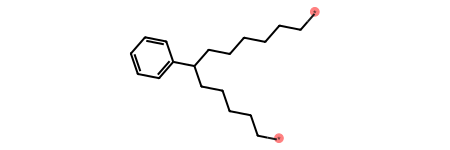

In [51]:
# Install a pip package directly from GitHub is also possible with the following command

# On Colab
# pip install 'psmiles[polyBERT]@git+https://github.com/Ramprasad-Group/psmiles.git'
# on Coder
# pdm add psmiles[polyBERT]@git+https://github.com/Ramprasad-Group/psmiles.git

from psmiles import PolymerSmiles

# PSMILES string of polystyrene
ps = "C(c1ccccc1)(C[*])[*]"
pe = "[*]CC[*]"
ps = PolymerSmiles(ps)
pe = PolymerSmiles(pe)
ps.linear_copolymer(pe, "ABBBBB")

In [ ]:
# Fingerprint of PS
ps.fingerprint()

(2048,)

# Tutorial

- Compute the fingerprint  of all these polymers in a loop

In [ ]:
import pandas as pd


psmiles_strings = [
    "*CC*",
    "*CCO*",
    "*CC(C)*",
    "*CC(CC)*",
]

fp_list = []
for smiles in psmiles_strings:
    fp = PolymerSmiles(smiles).fingerprint()
    fp_list.append(fp)

df = pd.DataFrame(psmiles_strings, columns=["PSMILES"])
df["fingeprint"] = fp_list
display(df)
fp_list

*CC*
*CCO*
*CC(C)*
*CC(CC)*


,PSMILES,fingeprint
0,*CC*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,*CCO*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,*CC(C)*,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,*CC(CC)*,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0])]

Action: 
- Measure similarity using `pairwise_distances` function of sklearn
- Return as pandas dataframe

In [63]:
# Yeah, sklearn again! We use the pairwise_distance
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Use `euclidean` distance d = sqrt((p1-q1)**2 + (p2-q2)**2 + ...)
# pairwise_distances( ...  metric="euclidean")


tt = pairwise_distances(fp_list, metric="cosine")
pd.DataFrame(tt, columns=psmiles_strings, index=psmiles_strings)

,*CC*,*CCO*,*CC(C)*,*CC(CC)*
*CC*,0.000000,0.340620,0.386059,4.196190e-01
*CCO*,0.340620,0.000000,0.537348,5.216351e-01
*CC(C)*,0.386059,0.537348,0.000000,3.000868e-01
*CC(CC)*,0.419619,0.521635,0.300087,4.440892e-16


In [58]:
pairwise_distances(fp_list, metric="euclidean")

NameError: name 'pairwise_distances' is not defined

Action:

- Create a one-hot encoded fingerprints of the PSMILES strings